3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


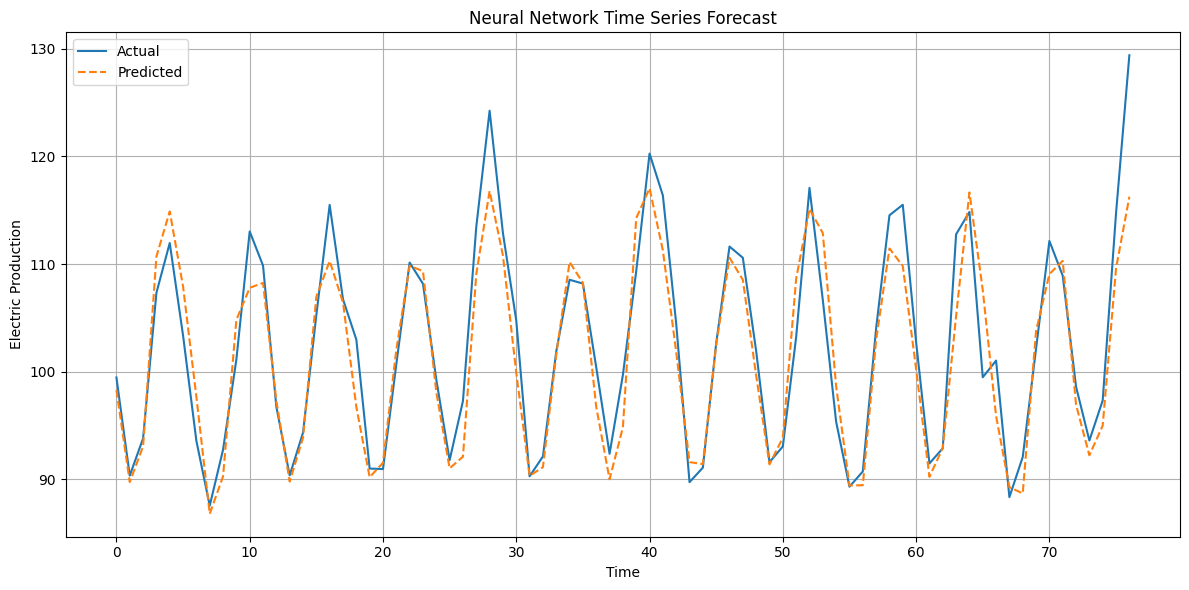

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv("Electric_Production.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
data = df['IPG2211A2N'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
def create_dataset(data, lag=12):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)
lag = 12
X, y = create_dataset(scaled_data, lag)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(lag,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted', linestyle='--')
plt.title('Neural Network Time Series Forecast')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
